## Analyse de la structure

In [6]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure.core import Spin
import numpy as np
import matplotlib.pyplot as plt

mp_key = "ER5V8i0JUw7k31Nk5IpkvogP61BDz9cw"
mp_id = "mp-441"
with MPRester(mp_key) as m:
    band = m.get_bandstructure_by_material_id(mp_id)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

### Bande interdite

La largeur de la bande interdite est de 1.8766 eV
Pour ce matériau, la bande interdite est : indirecte
Direction du vecteur de transition : X-\Gamma


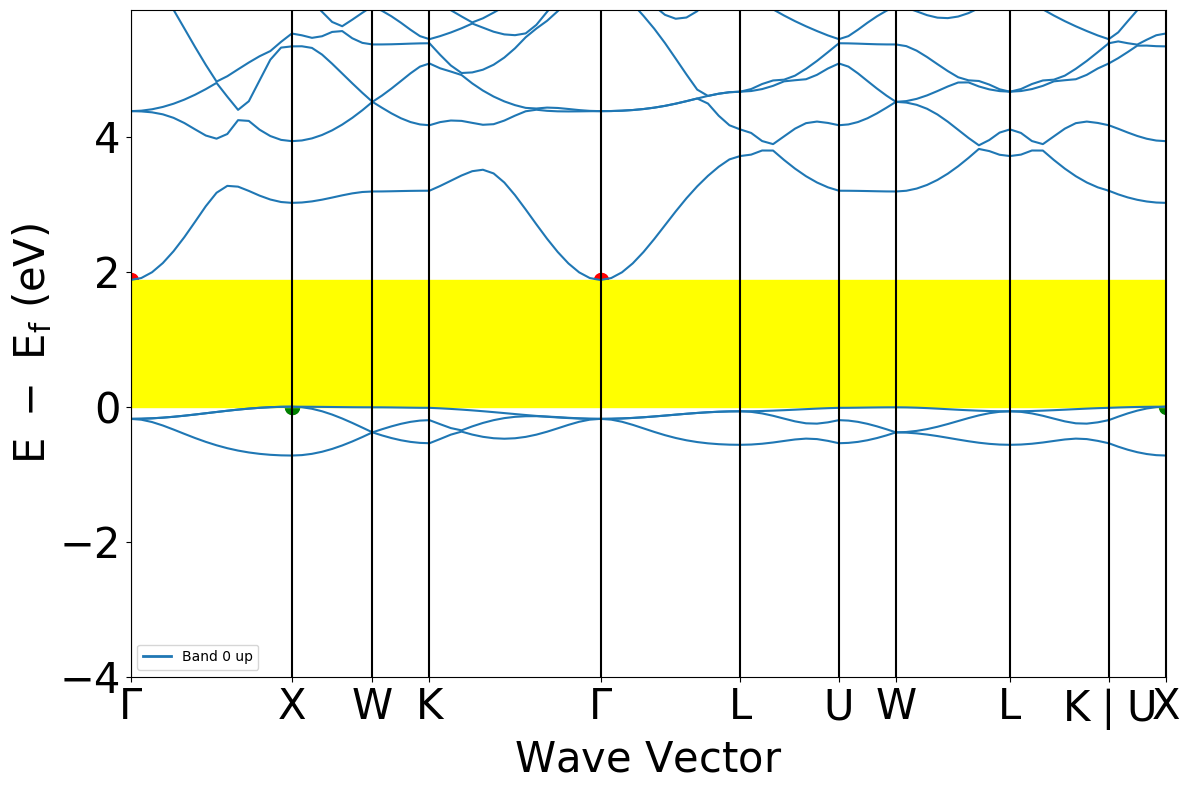

In [7]:
gap = band.get_band_gap()

if gap['direct']==True:
    direct = "directe"
else:
    direct="indirecte"
print("La largeur de la bande interdite est de " + str(gap["energy"])+ " eV")
print("Pour ce matériau, la bande interdite est : " + str(direct))
print("Direction du vecteur de transition : " + str(gap["transition"]))

# visualisation

bs = BSPlotter(band)
data = bs.bs_plot_data()
energy = gap.get('energy')
distance = data.get('ticks').get('distance')

bs.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(distance[0], distance[-1], 2), 0, energy, color = "yellow")
plot_data = bs.bs_plot_data()
data = plot_data['ticks']['distance']

### Derniere bande de valence

In [8]:
data = bs.bs_plot_data()

vbm = band.get_vbm() #bande de valence
cbm = band.get_cbm() #bande de conduction
index_cond = band.get_cbm()['band_index'][Spin.up][0]
index_val = band.get_vbm()['band_index'][Spin.up][0]
print("La dernière bande de valence est : "+str(index_val))
print("Energie de celle-ci : "+str(vbm.get('energy')) + "eV" )
print("\n")
print("La première bande de conduction est : "+ str(index_cond))
print("Energie de celle-ci : "+str(cbm.get('energy')) + "eV" )
print("\n")
print("La bande interdite est la différence entre les deux :" +str((cbm.get('energy')-(vbm.get('energy')))) + ' eV')


La dernière bande de valence est : 10
Energie de celle-ci : -0.1191eV


La première bande de conduction est : 12
Energie de celle-ci : 1.7575eV


La bande interdite est la différence entre les deux :1.8766 eV


#### Direction dispertion

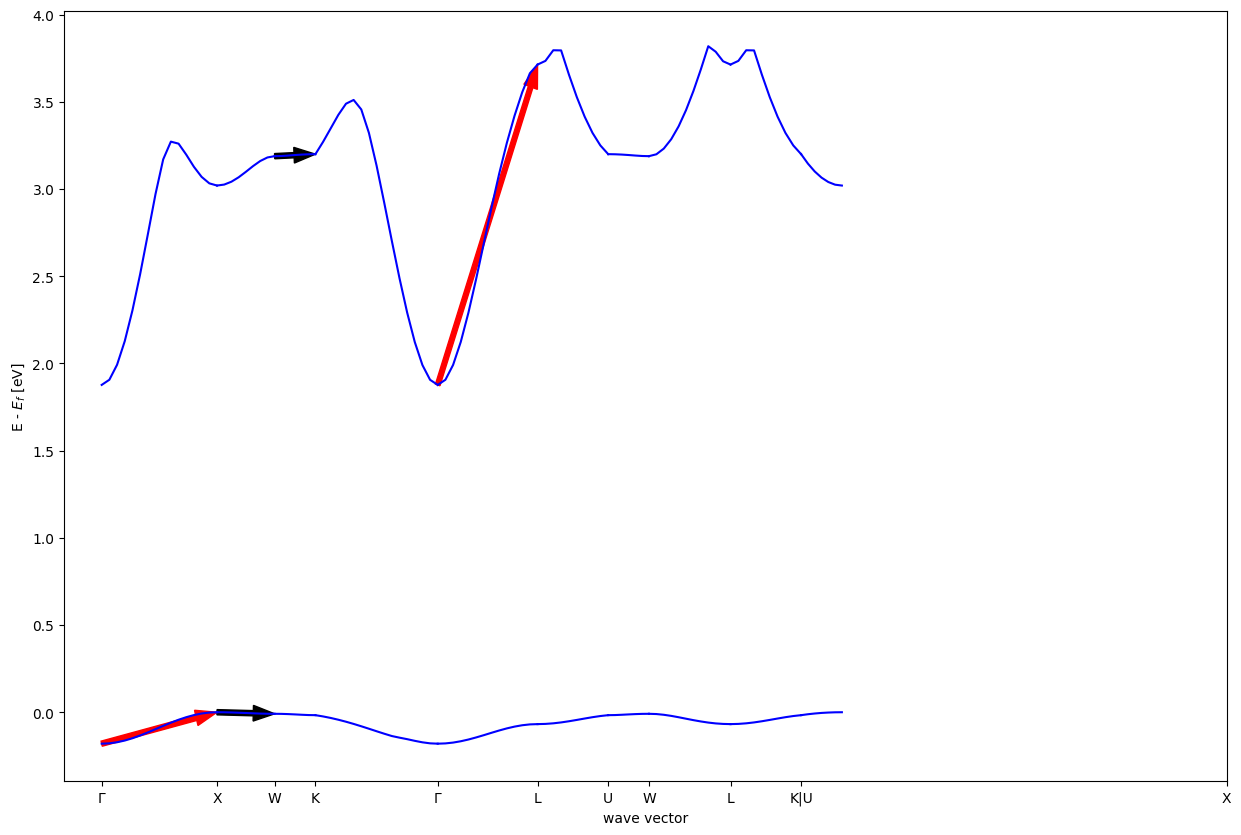

In [9]:
distance = data.get('distances')
energy = data.get('energy')

def slope(x,y):
    slope = abs(y[-1]-y[0])/(x[-1]-x[0])
    return np.array([slope,x[0],y[0],x[-1]-x[0],y[-1]-y[0]])

slope_val = np.zeros((len(distance), 5))
slope_con = np.zeros((len(distance), 5))

for i in range(len(distance)):
    slope_val[i] = slope(distance[i], energy["1"][i][11])
    slope_con[i] = slope(distance[i], energy["1"][i][12])

val_slopes = slope_val.T
con_slopes = slope_con.T

max_val = np.argmax(val_slopes[0])
min_val = np.argmin(val_slopes[0])
max_con = np.argmax(con_slopes[0]) 
min_con = np.argmin(con_slopes[0])

figure,axes = plt.subplots(1,1,figsize=(15,10))

for i in range(len(distance)):
    plt.plot(distance[i],energy['1'][i][11],'b')
    plt.plot(distance[i],energy['1'][i][12],'b')

for i in range(len(data.get("vbm"))):
    x, y= data.get("vbm")[i]
    plt.plot(x,y,markersize=10)

for i in range(len(data.get("cbm"))):
    x, y = data.get("cbm")[i]
    plt.plot(x,y,markersize=10)

dts=[]    
for i in range(len(distance)):
    dts.append(distance[i][0])

dts.append(7.10830014)
plt.arrow(val_slopes[1][max_val], val_slopes[2][max_val], val_slopes[3][max_val], val_slopes[4][max_val], color='red', width=0.030, length_includes_head=True)
plt.arrow(val_slopes[1][min_val], val_slopes[2][min_val], val_slopes[3][min_val], val_slopes[4][min_val], color='black', width=0.030, length_includes_head=True)
plt.arrow(con_slopes[1][max_con], con_slopes[2][max_con], con_slopes[3][max_con], con_slopes[4][max_con], color='red', width=0.030, length_includes_head=True)
plt.arrow(con_slopes[1][min_con], con_slopes[2][min_con], con_slopes[3][min_con], con_slopes[4][min_con], color='black', width=0.030, length_includes_head=True)

axes.set_xticks(dts)
axes.set_xticklabels(['Γ','X',"W",'K','Γ',"L",'U','W',"L",'K|U','X'])
axes.set_xlabel("wave vector")
axes.set_ylabel("E - $E_{f}$ [eV]")

plt.show()


### Masse effective derniere bande de valance et premmiere bande de conduction

In [10]:
h = 6.62607015e-34 
eV = 1.6022e-19
h_bar = h/(2*np.pi)
k_cond = band.get_cbm()['kpoint'].frac_coords*1e10
k_val = band.get_vbm()['kpoint'].frac_coords*1e10
E_cond = band.get_cbm()['energy']
E_val = band.get_vbm()['energy']
masse_cond = (h_bar**2 * (k_cond[0]**2+k_cond[1]**2+k_cond[2]**2))/(2*E_cond*eV)
print('Masse effective à la base de la première bande de conduction ' + str(masse_cond)+' kg\n')
masse_val = (h_bar**2 * (k_val[0]**2+k_val[1]**2+k_val[2]**2))/(2*abs(E_val)*eV)
print('Masse effective au sommet de la dernière bande de valence vaut ' + str(masse_val)+' kg\n')

Masse effective à la base de la première bande de conduction 0.0 kg

Masse effective au sommet de la dernière bande de valence vaut 1.4570143930107203e-29 kg

